<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/predictiveModeling/code/logistic_regression_lie_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git clone 'https://github.com/sarang-manohar/hogwarts.git'

fatal: destination path 'hogwarts' already exists and is not an empty directory.


### Import libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [22]:
rd = pd.read_csv(r'/content/hogwarts/academia/predictiveModeling/data/liedetector.csv')
rd.head(50)

,X1,X2,X3,X4,X5,X6
0,P_001,3.621600,8.66610,-2.80730,-0.446990,0
1,P_002,4.545900,8.16740,-2.45860,-1.462100,0
2,P_003,3.866000,-2.63830,1.92420,0.106450,0
3,P_004,3.456600,9.52280,-4.01120,-3.594400,0
4,P_005,0.232300,-4.45520,4.57180,-0.988800,0
5,P_006,4.368400,9.67180,-3.96060,-3.162500,0
6,P_007,3.591200,3.01290,0.72888,0.564210,0
7,P_008,2.092200,-6.81000,8.46360,-0.602160,0
8,P_009,3.203200,5.75880,-0.75345,-0.612510,0
9,P_010,1.535600,9.17720,-2.27180,-0.735350,0


In [23]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1372 non-null   object 
 1   X2      1372 non-null   float64
 2   X3      1372 non-null   float64
 3   X4      1372 non-null   float64
 4   X5      1372 non-null   float64
 5   X6      1372 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


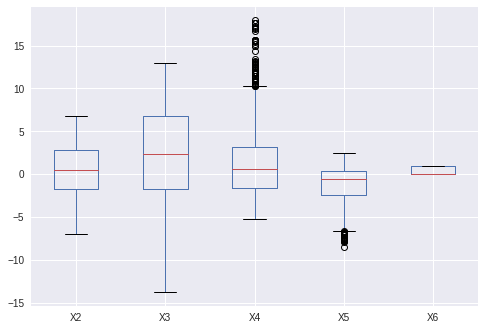

In [24]:
rd.boxplot()

In [25]:
rd.describe()

,X2,X3,X4,X5,X6
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433665,1.922353,1.397627,-1.191657,0.406706
std,2.842766,5.869047,4.310030,2.101013,0.491398
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [26]:
dups = rd.duplicated()
rd[dups]

,X1,X2,X3,X4,X5,X6


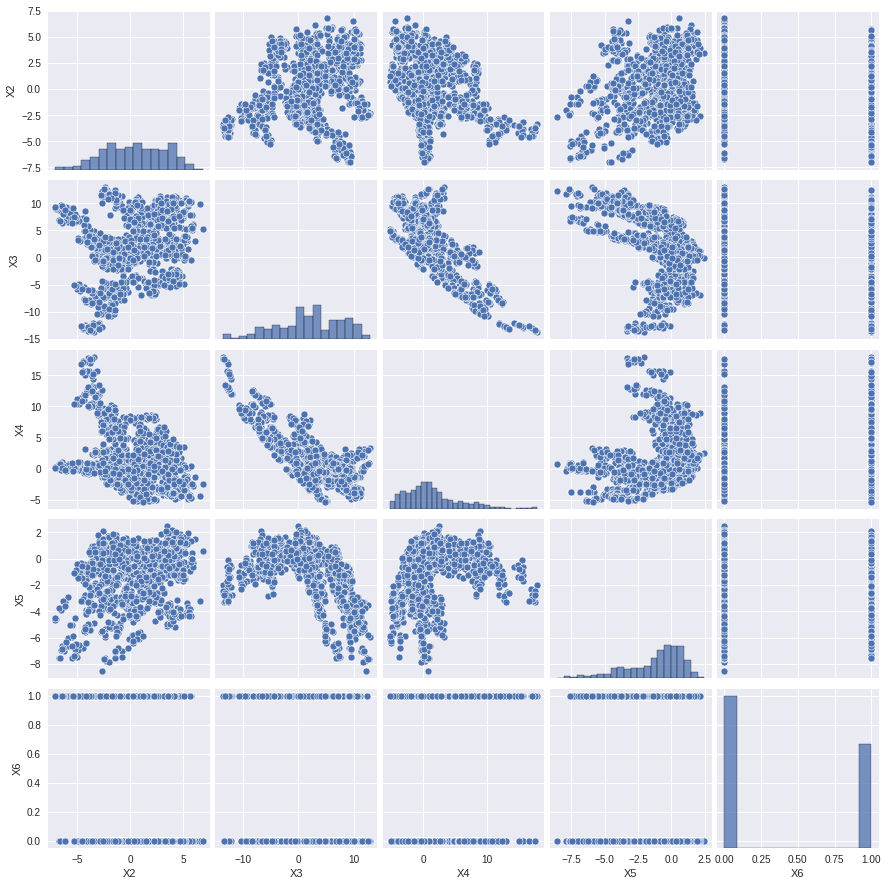

In [27]:
sns.pairplot(rd.drop('X1',axis=1))

In [28]:
rd['X6'].value_counts(normalize=True)

0    0.593294
1    0.406706
Name: X6, dtype: float64

In [18]:
X = rd.drop({'X1', 'X6'}, axis=1)
y = rd.pop('X6')
print(X.shape); print(y.shape);

(1372, 4)
(1372,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [30]:
lgrg = LogisticRegression()

In [31]:
lgrg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lgrg.coef_

array([[-0.55306285, -0.2941545 , -0.38366665,  0.06304428]])

In [32]:
#Predict the target variables for both training and test data using trained model
ytrain_predict = lgrg.predict(X_train); ytest_predict = lgrg.predict(X_test);

In [40]:
#Train data Confusion Matrix
print('Confusion Matrix on training data:')
print(confusion_matrix(y_train, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (lgrg.score(X_train,y_train)*100) )
print(classification_report(y_train, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Confusion Matrix on test data:')
print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (lgrg.score(X_test,y_test)*100) )
print(classification_report(y_test, ytest_predict))

Confusion Matrix on training data:
[[473  99]
 [ 50 338]]
Accuracy score : 84.5 percent
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       572
           1       0.77      0.87      0.82       388

    accuracy                           0.84       960
   macro avg       0.84      0.85      0.84       960
weighted avg       0.85      0.84      0.85       960



Confusion Matrix on test data:
[[208  34]
 [ 31 139]]
Accuracy score : 84.2 percent
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       242
           1       0.80      0.82      0.81       170

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412



Area under ROC : 85.2 percent
Best Threshold=0.490747, G-Mean=0.851


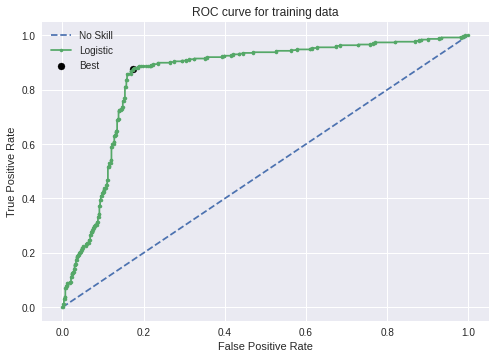

In [45]:
train_prob = lgrg.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 85.1 percent
Best Threshold=0.342249, G-Mean=0.847


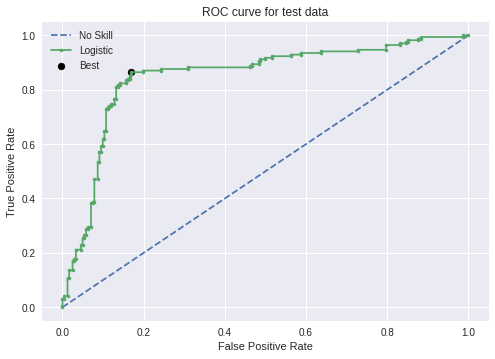

In [46]:
test_prob = lgrg.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()